In [41]:
import networkx as nx
import matplotlib as plt
import numpy as np
import pandas as pd

In [42]:
def randomWave(wavelist):
    random_seed=np.random.randint(len(wavelist))
    return wavelist[random_seed]

In [43]:
def zero_runs(a):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges      

def pathBand(path):
    path_len=len(path)
    #print(path)
    #print(path[0][0])
    resource=Resource[path[0][0]][path[0][1]][path[0][2]]
    for i in range(1,path_len):
        resource=list(map(lambda x: x[0]+x[1], zip(resource, Resource[path[i][0]][path[i][1]][path[i][2]])))
    pathbandList=zero_runs(resource) 
    
    return pathbandList

In [44]:
def zero_runs(a):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges      

def pathBand(path):
    path_len=len(path)
    #print(path)
    #print(path[0][0])
    resource=Resource[path[0][0]][path[0][1]][path[0][2]]
    for i in range(1,path_len):
        resource=list(map(lambda x: x[0]+x[1], zip(resource, Resource[path[i][0]][path[i][1]][path[i][2]])))
    pathbandList=zero_runs(resource) 
    
    return pathbandList

In [45]:
def pathBand_Ocuupy(loc1,loc2,wave1,band,index):
    path=SD_pathLink[loc1][loc2]
    pathBand=ALL_SD_bandwidth[loc1][loc2]
    for i in range(len(path)):
        for j in range(band):
            #print(path)
            #print(wave1)
            #print(Resource[path[i][0]][path[i][1]][path[i][2]][wave1+j])
            Resource[path[i][0]][path[i][1]][path[i][2]][wave1+j]+=index+1
            
    return

        
def pathUpdate():
    SR_bandwidth=[]
    #MaxBand=[]
    Hops=[]
    for i in range(len(SD_pathLink)):
        band=[]
        #Max=[]
        hops=[]        
        for j in range(len(SD_pathLink[i])):
            #cost.append(pathCost(SD_pathLink[i][j]))
            hops.append(len(SD_pathLink[i][j]))
            b=pathBand(SD_pathLink[i][j])
            #Max.append(max(b[:,1] - b[:,0]))
            band.append(b)            
        #SR_pathLink_cost.append(cost)
        SR_bandwidth.append(band)
        #MaxBand.append(Max)
        Hops.append(hops)
    global ALL_SD_bandwidth
    ALL_SD_bandwidth=SR_bandwidth
        
    return

In [46]:
def CoreSetup():
    Nodes_list=list(G.nodes)
    #Link_bypass=[]
    for i in Nodes_list:
        neighborList=list(G.neighbors(i))
        #bypasscore_num=len(neighborList)-1# set the bypass core number within each fiber 
        for j in range(len(neighborList)):
            dis=1
            while(j+dis<len(neighborList)):
                input_loc=edges_list.index((neighborList[j],i))
                output_loc=edges_list.index((i,neighborList[j+dis]))
                successFlag=0
                for m in range(7):
                    if(len(bypassEdges[input_loc][m])==0):
                        for n in range(7):
                            if(len(bypassEdges[output_loc][n])==0):
                                bypassEdges[output_loc][n].append(((neighborList[j],i,m)))
                                bypassEdges[input_loc][m].append(((i,neighborList[j+dis],n)))
                                successFlag=1
                                break
                        if(successFlag==1):
                            break
                input_loc=edges_list.index((neighborList[j+dis],i))
                output_loc=edges_list.index((i,neighborList[j]))
                successFlag=0
                for m in range(7):
                    if(len(bypassEdges[input_loc][m])==0):
                        for n in range(7):
                            if(len(bypassEdges[output_loc][n])==0):
                                bypassEdges[output_loc][n].append(((neighborList[j+dis],i,m)))
                                bypassEdges[input_loc][m].append(((i,neighborList[j],n)))
                                successFlag=1
                                break
                        if(successFlag==1):
                            break
                                                                                                        
                dis+=1
    return;

In [47]:
def bypassType(path):
    path_len=len(path)
    if(path_len==1):
        bypass_type=0
    elif(path_len==2):
        edgeLoc0=edges_list.index((path[0][0],path[0][1]))
        edgeLoc1=edges_list.index((path[1][0],path[1][1]))
        if(path[1] in Out_bypassEdges[edgeLoc0][path[0][2]] and path[0] in In_bypassEdges[edgeLoc1][path[1][2]] ) :
            bypass_type=2
        else:
            bypass_type=0
            
    elif(path_len==3):       
        edgeLoc0=edges_list.index((path[0][0],path[0][1]))
        edgeLoc1=edges_list.index((path[1][0],path[1][1]))
        edgeLoc2=edges_list.index((path[2][0],path[2][1]))
        if(path[1] in Out_bypassEdges[edgeLoc0][path[0][2]] and path[0] in In_bypassEdges[edgeLoc1][path[1][2]] ) :
            bypass_type=1
        elif(path[2] in Out_bypassEdges[edgeLoc0][path[1][2]] and path[1] in In_bypassEdges[edgeLoc1][path[2][2]] ):
            bypass_type=1
        else:
            bypass_type=0
                       
            
    return bypass_type
                
            
            
    

In [55]:
def PathAlgorithm_2(PathList,hopsList,bandwidth,pathBandList,bypassList,wave,bypass_index):
    Max=np.zeros(len(pathBandList))
    Sum=np.zeros(len(pathBandList))
    for i in range(len(pathBandList)):
        #print (pathBandList[i][:,1] - pathBandList[i][:,0])
        #print(i)
        #print(PathList[0])
        Max[i]=max(pathBandList[i][:,1] - pathBandList[i][:,0])
        Sum[i]=sum(pathBandList[i][:,1] - pathBandList[i][:,0])
    
    infor={"place":range(len(PathList)),
           "bypass":bypassList,
           "bandwidth": Max,
           "hops": hopsList,
           "sum":Sum
         }
    
    Path_infor=pd.DataFrame(infor)     
    #print(Path_infor)
    if(bypass_index==1):
        df=Path_infor.sort_values(by=["bypass","hops",'sum'],ascending=[False,True,False]) 
    else:
        df=Path_infor.sort_values(by=['sum',"hops","bypass"],ascending=[False,True,False]) 
    df.reset_index(drop=True, inplace=True)#reset the index sequence
    #print(df)
    Path=[]
    successful_flag=0
    for i in range(len(df)):
        if(df["bandwidth"][i]>bandwidth):
            for j in pathBandList[df["place"][i]]:
                if(wave>=j[0] and wave+bandwidth<=j[1]):
                    Path=PathList[df["place"][i]]
                    traffic_feedback.append(df["bypass"][i])
                    successful_flag=1
                    break 
        if(successful_flag==1):
            break
    if(len(Path)==0):
        traffic_feedback.append(-1)
        #print(df)
    return Path

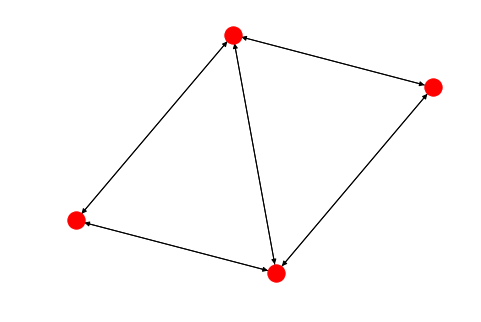

In [56]:
def edgeToLinks(path):
    pathlist=[]
    path_len=len(path)
    corePossib=7**path_len
    for i in range(corePossib):
        List=[]
        List.append((path[0]+(i%7,)))

        for j in range(1,path_len):
            List.append((path[j]+(int((i/(7**j)%7)),)))
        if(len(List)>0):
            pathlist.append(List)    
    return pathlist



TrafficCost=0
node_list=[0,1,2,3]
SR_pair=[(0,1),(1,0),(1,2),(2,1),(0,2),(2,0),(2,3),(3,2),(0,3),(3,0),(1,3),(3,1)]
edges_list=[(0,1),(1,0),(1,2),(2,1),(0,2),(2,0),(2,3),(3,2),(1,3),(3,1)]
bypassEdges=[]
In_bypassEdges=[]
Out_bypassEdges=[]
for i in range(len(edges_list)):
    BY=[]
    BY0=[]
    BY1=[]
    
    for j in range(7):
        BY.append([])
        BY0.append([])
        BY1.append([])
    bypassEdges.append(BY)
    In_bypassEdges.append(BY0)
    Out_bypassEdges.append(BY1)
    

   
#先对D=2的节点进行bypass设置，在对D=3的节点进行bypass设置
#每次设置都在该link中不存在

G=nx.DiGraph()
G.add_nodes_from(node_list)
G.add_edges_from(edges_list)
nx.draw(G)

#plt.show()


link_list=[] 

for k in range(len(edges_list)):
    link_list0=[]
    for i in range(7):
        link_list0.append(edges_list[k]+(i,)) 
    link_list.append(link_list0)

SD_path=[]
SR_pathLink=[]
for i in range(len(SR_pair)):
    path0=[]
    for path in nx.all_simple_paths(G, source=SR_pair[i][0], target=SR_pair[i][1]):
        path_edges=[]            
        for j in range(len(path)-1):
            path_edges.append((path[j],path[j+1]))
        path0.append(path_edges)
    SD_path.append(path0)


#CoreSetup() 
for i in range(len(bypassEdges)):
    Link=bypassEdges[i]
    for j in range(7):
        if(len(Link[j])>0):
            if(Link[j][0][0]==edges_list[i][1]):
                
                Out_bypassEdges[i][j]=Link[j]
            elif(Link[j][0][1]==edges_list[i][0]):
                In_bypassEdges[i][j]=Link[j]

In [57]:
SD_pathLink=[]  
for i in range(len(SD_path)):
    Links=[]
    for j in range(len(SD_path[i])):
        Links=Links+edgeToLinks(SD_path[i][j])
        
    SD_pathLink.append(Links)

In [58]:
Total_bandwidth=161
Resource=np.zeros([4,4,7,161]).tolist()
ALL_SD_bandwidth=[]
MaxBand=[]
Hops=[]
Bypass_Type=[]
for i in range(len(SD_pathLink)):
    Band=[]
    Max=[]
    Hhops=[]
    Bypass=[]
    for j in range(len(SD_pathLink[i])):
        Hhops.append(len(SD_pathLink[i][j]))
        b=pathBand(SD_pathLink[i][j])
        Max.append(max(b[:,1] - b[:,0]))
        Band.append(b)
        Bypass.append(bypassType(SD_pathLink[i][j]))
    ALL_SD_bandwidth.append(Band)
    MaxBand.append(Max)
    Hops.append(Hhops)
    Bypass_Type.append(Bypass)
    

In [59]:
Traffic=pd.read_csv('traffic.csv',sep=',',names=['S','D','band'])
SuccessFlag=np.zeros(len(Traffic))
traffic_wave=[]
traffic_path=[]
traffic_feedback=[]
Traffic_num=len(Traffic)
for i in range(Traffic_num):
    traffic=(Traffic['S'][i],Traffic['D'][i])
    if(i%2==0):
        bypass_index=1
    else:
        bypass_index=0
    band=Traffic['band'][i]
    traffic_Path=SD_pathLink[SR_pair.index(traffic)]
    traffic_Hops=Hops[SR_pair.index(traffic)]
    traffic_Band=ALL_SD_bandwidth[SR_pair.index(traffic)]
    traffic_Bypass=Bypass_Type[SR_pair.index(traffic)]
    wave=list(range(Total_bandwidth-1))
    while(len(wave)):
        PathFlag=0
        select_wave=randomWave(wave)
        print(select_wave)
        selectPath=PathAlgorithm_2(traffic_Path,traffic_Hops,band,traffic_Band,traffic_Bypass,select_wave,bypass_index)
        if(len(selectPath) and select_wave+band<=160):
            Pathloc=traffic_Path.index(selectPath)
            pathBand_Ocuupy(SR_pair.index(traffic),Pathloc,select_wave,band,i)
            PathFlag=1
            traffic_wave.append(select_wave)
            traffic_path.append(selectPath)
            pathUpdate()
            break
        else:
            wave.remove(select_wave)
    
    if(PathFlag==1):
        SuccessFlag[i]=1
        
print(SuccessFlag) 

93
131
138
6
2
137
96
40
28
89
113
78
58
104
149
53
137
81
150
130
143
91
153
149
132
83
76
28
78
5
53
42
47
138
127
135
144
18
30
136
108
98
129
149
10
34
75
155
3
4
42
96
35
104
69
125
56
1
158
123
87
119
137
80
82
21
101
48
131
144
78
139
129
124
81
156
147
75
104
96
95
45
71
153
102
48
154
86
24
154
66
39
19
52
158
129
31
74
153
118
42
47
18
0
83
24
27
16
95
63
21
22
11
59
2
123
154
119
2
57
70
84
149
51
62
115
135
113
41
63
122
126
39
12
121
105
124
93
135
80
99
115
4
110
136
86
23
79
159
124
103
149
140
35
79
137
107
158
47
129
63
35
109
14
153
51
123
35
92
63
147
132
17
15
46
60
5
159
19
96
159
91
7
121
129
134
128
126
7
82
12
57
151
132
153
20
128
100
17
7
142
48
17
122
62
124
157
113
52
28
54
158
97
139
122
123
83
141
25
77
7
111
113
31
26
111
108
153
105
2
76
149
46
132
153
112
143
48
144
143
114
135
70
137
80
126
24
74
101
146
118
36
117
140
111
89
30
82
52
22
33
104
19
34
134
103
99
127
101
13
91
54
24
137
101
24
25
47
97
57
35
109
102
50
138
48
18
36
39
119
21
37
84
47
132

37
47
73
85
4
97
140
92
122
18
98
12
44
34
89
118
95
0
65
123
43
15
109
1
32
78
8
36
17
132
121
84
130
124
113
128
67
23
146
7
2
149
10
33
143
102
5
70
66
116
21
72
42
48
54
96
60
108
30
49
154
81
110
88
29
6
111
76
26
152
75
105
58
117
133
55
103
115
153
27
157
104
106
28
16
45
129
46
56
112
80
87
19
69
139
64
74
90
156
158
141
52
135
144
77
107
134
114
147
137
68
150
11
91
155
20
125
39
35
159
24
131
22
13
40
126
99
94
59
61
100
53
145
71
127
82
50
142
101
3
51
34
15
91
140
73
56
103
38
138
139
110
13
50
113
30
144
117
59
4
87
80
127
147
148
29
111
33
43
34
36
69
121
122
3
12
55
44
83
152
5
93
53
10
146
84
64
137
2
18
98
105
21
78
133
142
72
46
37
42
17
81
118
60
155
151
79
115
109
132
24
124
108
49
62
143
52
85
31
86
32
131
11
136
51
120
97
158
57
15
14
28
58
54
77
89
16
107
39
94
128
116
102
82
157
101
7
134
104
92
156
75
8
6
88
159
100
41
67
90
76
35
26
25
129
66
135
9
125
23
150
65
74
27
20
123
71
145
96
119
154
149
70
112
19
22
91
47
48
106
45
40
126
63
61
1
0
95
153
114
99
68
1

76
87
95
141
40
51
114
67
78
126
41
25
128
80
148
61
8
79
73
113
151
97
14
101
135
106
83
16
0
136
17
92
143
53
110
6
157
153
104
150
52
152
120
45
124
93
81
23
84
149
13
60
99
3
69
63
36
158
105
26
12
38
118
146
155
133
57
18
50
48
154
112
144
142
140
137
27
37
147
28
159
44
77
117
59
121
55
7
9
102
130
42
116
64
2
156
138
21
82
62
74
46
86
145
43
123
119
11
129
24
75
58
56
94
47
49
70
103
29
134
32
109
108
35
72
98
132
5
69
44
53
38
19
83
75
150
49
46
22
64
125
142
131
43
144
73
26
63
39
122
62
8
139
65
157
135
11
57
114
20
93
84
82
67
92
13
28
117
33
0
106
136
37
12
61
87
155
47
14
70
81
98
16
78
103
45
85
3
36
132
148
101
51
140
29
134
15
50
21
77
102
159
7
30
118
79
48
18
89
54
6
52
17
108
72
80
59
138
137
154
42
5
55
24
74
94
2
149
130
97
66
152
60
111
32
147
99
129
126
100
88
31
10
123
116
128
153
107
35
56
96
133
40
109
25
127
90
105
68
41
115
95
71
9
151
121
110
119
145
1
158
143
58
76
104
156
27
4
113
86
112
34
120
146
124
141
91
23
153
13
99
25
149
82
22
5
18
155
131
34
106


1
112
125
10
91
142
5
33
25
124
150
92
143
116
51
109
45
26
29
154
135
95
68
146
131
27
134
75
129
155
98
71
66
132
153
47
72
37
96
11
147
152
24
55
144
2
111
63
141
31
32
62
34
80
108
9
149
41
119
104
118
57
77
8
64
13
73
140
35
121
107
19
53
145
120
16
65
102
30
43
128
12
93
38
88
28
23
113
103
158
59
39
70
44
46
114
99
144
122
139
143
121
58
112
94
117
113
43
78
80
104
47
71
79
114
98
83
32
126
48
106
152
97
146
115
16
59
96
39
62
137
111
42
158
9
72
149
133
128
120
107
73
24
132
124
60
151
54
8
123
50
7
51
22
30
56
46
6
141
11
150
87
108
155
15
33
119
66
145
95
12
84
67
153
90
0
10
25
36
68
77
49
125
130
18
3
89
55
101
57
134
139
53
140
118
35
122
44
100
21
157
40
70
4
85
14
91
109
86
92
81
31
131
64
69
127
142
41
26
17
154
135
147
121
2
75
82
148
103
88
116
23
74
110
61
1
29
13
136
76
63
105
34
99
129
20
38
45
102
19
52
144
65
93
27
156
138
28
5
143
37
159
159
19
135
43
15
123
65
38
106
94
6
63
7
60
68
57
128
61
33
21
40
45
86
28
48
133
55
52
141
32
92
130
85
71
3
120
64
10
144
97

37
89
151
38
47
70
62
127
117
46
140
79
107
57
53
132
112
111
101
118
86
83
13
85
147
113
114
143
87
159
36
73
105
157
54
68
104
158
149
75
4
110
122
61
63
43
65
95
136
29
66
11
35
56
96
58
131
92
102
32
134
72
69
99
124
98
150
84
152
76
108
133
59
118
158
136
134
103
2
138
126
43
58
83
8
9
86
132
74
16
76
35
28
75
20
101
107
89
63
139
73
115
17
70
44
66
50
53
88
102
81
77
33
96
124
21
151
26
12
110
155
157
90
131
62
14
48
135
6
128
68
13
133
149
122
23
82
84
119
22
0
78
55
27
104
145
97
7
67
116
117
59
30
54
87
142
46
99
98
154
113
91
45
56
10
29
156
95
140
114
31
92
94
144
129
152
5
93
49
123
37
24
11
100
153
147
38
47
79
109
159
64
52
105
41
57
137
130
25
40
42
121
80
108
85
127
150
125
4
18
1
69
65
19
15
34
51
143
36
32
72
112
146
141
3
148
61
120
106
111
71
60
39
17
69
53
9
97
13
43
14
64
78
120
149
29
135
118
148
107
110
111
108
35
51
95
93
70
52
130
147
85
30
58
104
132
46
38
94
143
16
116
157
53
37
98
102
21
150
45
79
4
88
9
11
60
6
133
19
50
142
0
96
2
119
25
41
139
154
100
22

129
32
18
47
92
80
5
38
77
27
78
64
145
44
91
146
67
2
127
112
139
70
128
97
88
118
115
153
7
152
58
15
117
31
114
155
136
24
6
34
87
41
79
132
36
109
120
103
113
39
125
154
65
29
100
101
142
4
53
105
140
147
99
104
119
0
42
48
116
63
159
133
146
46
106
10
114
74
140
125
4
82
142
35
80
125
0
98
40
106
91
13
11
100
85
109
152
63
94
77
1
10
22
155
7
52
34
51
108
9
44
98
116
79
137
3
154
72
112
39
139
65
75
159
96
146
13
113
118
153
33
102
57
151
80
73
15
105
46
26
47
42
103
83
36
106
38
8
84
122
93
54
129
61
67
97
91
121
158
82
111
123
156
131
104
145
130
14
49
25
138
37
32
24
0
88
87
71
117
18
150
110
78
30
95
136
127
27
76
29
16
128
53
147
48
92
45
115
28
135
86
70
157
50
64
134
40
114
124
132
23
4
133
41
125
62
58
17
148
149
119
90
2
35
81
89
143
56
120
101
19
55
12
141
6
142
140
68
60
20
21
31
5
69
66
99
11
74
43
59
144
107
126
125
156
57
120
39
13
116
50
89
72
38
99
64
15
46
10
137
74
154
67
4
16
146
11
75
9
7
139
118
24
94
103
119
80
90
12
34
23
70
128
82
28
42
91
49
153
95
19
73
5

19
110
36
89
34
71
117
138
23
142
102
55
60
52
8
38
123
121
125
62
35
3
43
10
42
12
67
158
30
15
29
136
77
111
141
20
149
148
144
44
78
45
151
105
61
47
72
107
6
120
99
84
108
75
137
25
80
132
32
124
94
88
66
145
13
4
130
153
113
127
58
118
134
37
91
40
53
74
150
128
126
46
54
135
39
2
87
0
159
123
55
115
114
146
78
132
13
76
103
101
29
107
22
51
0
150
86
158
83
80
111
40
30
153
2
51
29
50
142
83
56
46
66
31
5
132
123
139
80
94
127
74
92
77
112
154
99
158
87
126
67
114
130
23
44
41
7
70
76
121
75
85
79
26
117
156
137
62
116
144
24
111
18
98
96
119
133
140
54
151
110
8
86
147
40
58
55
48
34
64
52
157
53
105
10
0
115
129
72
36
33
12
118
131
136
14
68
32
42
57
6
78
155
20
102
17
11
159
143
88
148
89
107
3
30
21
146
106
125
103
59
49
95
38
100
84
91
149
104
69
35
135
71
47
1
82
22
65
138
124
145
15
120
93
97
27
28
141
134
4
60
63
37
81
25
109
73
43
13
90
45
113
150
122
39
16
128
108
61
19
152
9
101
115
123
61
23
15
154
14
54
3
131
97
89
69
74
61
126
102
130
113
16
23
52
79
48
31
78
25
151


71
10
142
136
2
5
61
123
13
137
140
44
152
97
35
46
106
67
78
86
131
96
111
88
62
118
151
98
122
39
89
41
17
64
38
42
12
128
115
138
119
120
26
116
99
49
65
87
33
19
79
56
144
74
58
126
66
130
11
36
63
29
92
129
132
84
80
43
16
72
77
134
93
8
70
50
145
76
157
0
121
143
117
94
112
57
51
52
105
60
6
40
135
22
23
53
154
14
81
119
84
21
148
111
133
86
36
27
94
159
80
139
35
14
24
105
92
33
84
108
69
124
42
3
51
87
11
14
73
40
134
155
67
146
99
103
77
47
158
79
45
143
22
5
128
4
100
101
122
145
10
129
152
39
75
28
17
136
88
141
118
104
139
148
116
31
65
102
56
95
82
91
41
50
131
2
119
105
70
115
37
57
154
89
142
6
49
24
133
19
153
93
61
43
86
109
156
130
12
36
149
125
71
151
38
44
94
48
92
54
120
16
159
140
114
85
46
90
107
123
127
64
113
117
1
157
68
135
74
97
7
121
106
29
144
81
32
60
15
30
83
96
110
21
59
13
62
78
23
80
27
112
53
76
137
52
63
8
138
58
111
132
0
66
55
126
9
150
72
35
34
26
147
25
98
20
18
76
50
68
113
144
19
115
95
54
61
80
88
116
156
148
86
106
39
5
25
83
92
124
64
158
5

22
48
93
28
87
20
141
61
129
48
0
64
66
74
59
89
123
75
128
124
2
85
114
13
16
142
146
98
156
117
22
73
92
110
150
30
45
120
8
91
5
159
18
94
28
119
100
58
152
72
42
9
20
46
19
6
132
86
50
15
35
11
136
65
25
48
134
0
141
55
82
153
90
102
109
104
111
155
121
129
80
130
101
62
112
81
99
69
83
77
149
40
26
113
148
138
140
54
139
23
137
61
31
41
14
126
71
44
97
76
32
1
78
135
96
70
157
53
143
49
43
147
37
95
125
12
144
39
36
158
52
57
34
106
107
56
60
29
79
7
68
131
33
17
133
84
38
4
115
154
93
105
87
108
47
51
63
3
21
118
116
10
127
67
103
122
151
88
24
145
27
86
32
138
9
145
57
93
103
151
129
135
7
58
149
44
60
36
122
123
70
43
45
156
96
140
151
87
28
108
83
23
30
12
148
27
8
19
139
135
79
68
102
124
59
84
128
143
16
89
18
117
41
99
77
154
106
105
144
15
80
88
61
90
104
155
21
153
48
1
114
64
146
116
63
14
112
97
78
46
121
158
110
109
67
130
7
100
98
82
113
138
10
95
145
81
74
134
107
133
38
75
32
69
152
11
71
136
2
31
147
92
127
47
132
22
26
141
91
33
101
40
49
159
17
20
93
85
37
6
52
6

0
149
138
28
85
105
62
108
74
9
37
77
100
148
147
90
137
86
97
72
11
94
127
54
21
141
20
159
14
63
125
50
123
13
42
69
32
144
113
4
58
5
145
16
61
103
129
124
34
156
65
131
154
73
114
68
121
12
122
66
143
53
132
146
78
128
3
44
29
88
8
35
155
36
18
153
81
150
1
109
48
135
45
118
10
49
59
142
24
76
23
64
17
22
95
70
80
43
67
25
33
40
158
19
101
130
104
106
41
126
84
140
15
102
134
93
92
47
7
39
87
99
82
38
96
98
89
56
55
31
52
117
30
91
6
120
75
110
26
111
51
107
2
151
46
27
71
96
114
7
128
46
55
156
84
34
14
74
50
28
21
97
13
136
77
38
81
48
32
67
36
8
85
111
152
126
79
51
110
9
29
66
64
117
138
2
135
90
5
33
98
11
76
118
80
93
59
105
113
159
69
0
37
43
20
150
87
45
68
134
137
40
27
56
42
86
133
103
31
123
124
153
60
131
39
127
140
157
47
82
107
25
129
1
112
151
73
101
72
16
104
22
54
132
116
99
147
144
61
89
158
30
120
91
106
100
115
94
44
70
52
130
4
108
53
6
3
41
95
141
125
65
148
12
35
102
119
23
19
57
121
155
49
143
26
18
17
92
146
78
139
149
83
142
10
15
109
24
62
122
154
145
58


49
44
69
87
74
76
153
158
133
142
106
108
51
41
96
55
1
72
134
10
128
113
33
6
40
84
151
91
59
156
46
71
48
101
148
64
154
22
14
98
80
97
102
159
65
29
3
95
79
118
18
35
63
0
122
103
99
157
39
32
127
15
110
57
82
107
50
93
152
143
63
111
44
156
76
86
10
132
19
57
66
46
139
8
154
41
124
18
129
31
12
96
51
11
83
82
36
55
112
136
133
128
64
58
107
138
135
23
149
26
108
131
98
142
30
147
62
137
35
106
126
104
27
118
24
21
16
3
94
105
101
117
22
130
5
13
59
91
97
6
14
32
34
158
42
28
88
120
145
121
144
25
151
73
80
7
72
48
159
123
140
9
38
65
1
60
110
37
157
122
99
0
141
125
2
70
78
63
61
150
90
45
33
81
111
100
67
89
77
40
74
143
113
102
71
53
93
20
49
39
47
50
15
92
146
54
79
29
119
116
52
134
148
43
75
109
56
17
4
114
87
68
84
69
115
85
95
44
103
153
127
152
155
84
46
101
40
148
86
129
72
32
37
115
99
103
155
92
26
132
25
154
150
153
69
57
45
118
100
62
46
127
27
61
18
139
123
68
95
156
16
107
157
124
29
48
19
65
35
70
42
130
159
3
97
122
11
128
158
133
59
144
111
145
119
140
75
6
94
14


63
40
149
42
75
94
29
124
59
32
90
115
77
52
21
45
119
53
142
58
81
89
13
91
117
116
11
120
138
64
148
24
4
137
5
8
30
66
3
126
140
38
92
54
44
118
110
153
43
2
159
20
36
41
51
123
80
46
157
88
72
31
125
146
7
27
84
39
0
104
95
108
114
112
107
139
78
70
136
83
101
112
127
80
133
46
34
52
62
101
136
91
64
5
109
149
30
69
74
96
63
125
98
10
137
122
140
126
15
144
77
94
118
81
41
55
155
138
79
121
99
123
45
146
49
103
32
76
111
56
156
48
35
11
50
27
108
130
26
3
92
51
150
85
128
114
132
4
90
61
119
58
87
139
54
141
13
152
47
44
157
129
40
153
120
93
37
68
28
82
159
117
88
1
84
2
148
135
151
97
60
83
39
105
42
143
25
115
7
29
104
89
36
57
86
145
95
6
75
18
124
33
78
112
43
0
142
31
16
14
72
113
66
70
12
134
17
73
22
147
20
131
19
59
23
158
53
24
71
154
106
116
110
100
8
9
21
107
67
65
102
38
140
3
59
70
129
32
46
10
90
33
49
87
156
25
120
146
148
36
35
105
28
78
69
113
17
80
38
149
85
99
91
8
68
151
150
42
154
115
88
43
14
56
104
126
76
27
65
95
22
60
106
4
102
111
41
55
128
159
82
142
116

74
24
101
117
11
65
57
10
49
27
121
147
0
55
16
75
15
46
139
131
25
42
108
61
63
145
83
69
68
99
23
9
50
151
28
2
62
85
109
98
157
43
143
21
91
105
136
59
36
122
150
56
126
72
32
120
146
18
134
5
37
19
94
155
76
106
88
47
26
82
89
103
3
44
81
123
158
113
8
4
14
1
119
70
154
73
40
90
97
7
148
80
17
60
20
35
30
54
78
104
141
33
31
86
95
132
41
128
118
51
140
58
114
34
84
115
138
142
6
107
12
53
13
144
135
38
156
137
29
149
125
130
133
67
96
159
93
112
152
52
66
153
48
127
102
129
79
64
110
22
116
39
43
58
113
11
91
68
4
23
6
25
95
134
135
131
51
148
158
143
50
57
92
74
60
73
130
11
38
48
116
37
107
151
154
133
3
28
85
52
111
70
125
24
65
103
20
21
156
35
142
101
30
113
64
61
144
159
79
104
99
32
97
56
87
86
49
0
22
106
10
119
39
17
83
7
117
58
139
105
157
80
94
75
138
120
100
132
13
59
129
26
9
90
77
66
19
14
36
2
71
69
102
46
27
82
88
140
47
31
112
34
63
147
155
109
114
89
67
93
18
72
145
150
141
84
55
44
15
5
108
115
1
122
110
42
81
29
54
40
146
12
126
124
118
53
16
43
153
41
8
137
33


153
30
116
132
113
54
123
117
44
18
118
98
42
58
26
124
120
88
60
127
81
14
142
109
77
110
137
54
123
35
132
149
13
90
144
17
2
7
116
45
143
57
74
67
105
139
96
78
19
27
76
113
159
106
65
6
12
84
92
133
147
16
22
73
145
82
83
135
126
119
130
59
157
156
9
34
148
134
101
158
141
23
56
155
125
31
80
39
114
75
68
33
69
15
29
64
86
150
43
21
97
94
5
153
46
25
52
102
107
122
70
121
61
85
11
140
3
4
129
87
66
91
117
30
72
10
62
51
20
49
104
136
53
99
41
63
79
55
32
128
38
100
71
95
138
146
115
1
0
131
36
47
112
8
37
50
40
152
103
154
151
89
111
48
24
108
28
93
85
42
31
54
137
7
84
66
68
59
12
119
101
11
21
77
57
81
51
37
50
112
40
118
155
133
106
6
86
96
18
46
108
20
13
100
74
104
140
9
97
34
19
145
23
109
93
43
76
107
42
159
32
39
91
124
143
130
17
52
1
62
75
152
14
138
82
123
147
134
22
158
122
70
2
131
29
85
16
63
35
88
78
153
45
125
67
38
121
151
5
105
94
141
139
103
28
149
56
129
132
111
150
71
79
148
98
69
115
25
24
128
41
110
114
61
154
15
8
120
126
64
144
27
117
95
30
102
53
157
72
11

49
68
90
51
76
11
153
125
127
116
9
35
6
136
134
1
53
132
7
32
5
101
146
80
50
64
72
143
30
33
67
26
110
38
8
81
128
47
123
71
77
7
78
150
100
107
23
84
103
79
114
28
59
27
88
86
13
40
108
99
125
149
154
119
130
73
102
144
68
138
104
157
5
158
118
98
124
37
89
15
50
22
140
106
66
74
85
70
21
6
139
133
57
12
131
91
39
35
155
16
76
153
1
120
151
42
25
65
2
135
20
80
60
111
148
101
121
10
83
115
92
19
109
31
113
29
54
152
137
45
63
126
146
9
4
58
94
3
53
159
93
32
97
147
43
132
105
69
51
142
82
55
90
48
18
56
49
141
75
36
122
127
96
24
136
0
129
117
62
14
34
17
145
46
95
61
41
44
134
52
11
116
87
112
156
125
11
4
157
128
37
124
70
22
67
145
76
43
103
64
38
65
111
5
153
108
47
0
144
115
95
123
61
110
44
23
116
133
9
42
74
50
151
53
77
60
114
119
147
94
118
131
93
46
84
137
152
132
155
34
29
129
19
1
102
68
14
55
148
96
121
73
66
71
3
40
12
158
100
49
8
82
31
56
86
140
127
80
143
20
135
16
41
85
48
26
45
62
25
150
146
149
75
51
69
104
117
54
122
139
98
134
92
27
142
7
18
15
35
107
90
58
112

23
41
36
62
85
104
42
49
105
98
21
18
3
127
33
24
138
140
136
13
83
60
158
133
77
66
27
52
112
142
116
54
89
95
102
156
37
87
69
109
10
145
123
103
46
92
72
65
63
106
146
82
122
90
115
153
51
108
132
124
43
45
59
16
11
56
151
22
12
91
30
110
97
117
81
76
126
155
152
154
111
9
40
2
55
113
0
26
101
31
47
147
79
25
119
121
129
73
64
157
7
68
50
150
20
48
6
70
107
149
35
34
57
61
38
44
120
32
144
128
94
80
141
71
58
139
84
125
137
135
86
75
130
4
5
70
77
29
117
24
55
150
84
20
125
15
61
144
49
91
112
51
33
79
94
156
120
67
68
7
153
0
122
136
47
109
146
43
110
147
115
108
137
75
44
26
128
143
104
82
34
141
57
106
6
103
30
154
85
48
37
27
152
80
74
126
100
25
70
9
107
98
72
124
54
1
140
62
96
138
32
16
59
12
123
134
52
86
39
118
131
36
113
21
65
53
23
102
40
132
31
63
22
90
19
129
58
3
73
78
157
66
151
111
127
5
95
45
35
71
145
159
28
56
130
46
142
69
89
13
4
18
81
76
50
97
101
60
11
38
121
133
42
92
14
148
99
139
83
2
149
64
105
116
8
158
41
114
17
119
155
10
135
93
88
87
151
15
145
86
131


142
84
44
46
47
1
40
158
88
83
51
72
43
58
107
61
62
22
57
26
35
33
20
21
79
75
155
156
102
54
25
60
73
89
45
100
149
138
136
32
124
101
152
103
36
5
119
105
153
159
37
118
104
132
123
9
49
18
82
41
70
151
127
150
55
125
8
117
122
147
139
143
111
63
19
80
141
97
48
86
11
145
39
6
2
130
67
77
65
50
98
10
31
68
157
17
135
139
104
12
43
94
139
75
130
158
102
140
145
98
155
87
100
34
23
11
3
127
120
17
86
68
88
10
78
53
72
151
138
114
43
148
146
85
67
90
113
132
101
157
128
150
133
57
137
103
45
65
118
38
122
119
107
42
0
134
125
112
71
31
131
47
92
121
106
29
20
35
123
37
89
5
99
59
115
149
156
46
117
141
6
25
28
111
153
13
64
81
8
60
48
83
52
152
126
91
143
82
51
54
50
69
76
32
104
144
1
105
36
33
77
154
40
12
56
79
22
142
80
147
93
58
4
2
124
41
84
24
15
44
63
30
129
55
97
136
49
109
66
73
61
70
74
9
159
96
135
110
7
26
19
95
116
27
16
21
39
14
108
18
62
30
159
93
123
6
103
121
147
130
69
19
21
143
142
125
146
95
10
92
106
118
34
51
112
85
153
94
135
54
137
152
74
56
47
3
36
132
49
4
20

131
18
52
20
49
83
28
151
98
143
60
8
121
142
9
46
134
139
123
4
39
126
79
13
48
14
21
130
132
113
154
62
12
114
86
89
51
119
111
108
78
127
74
5
69
118
63
91
71
124
59
54
81
7
24
43
26
95
73
129
92
110
133
138
25
96
85
156
30
105
19
153
66
42
69
122
124
101
15
11
135
126
158
59
52
36
37
28
86
105
150
44
128
13
50
40
146
138
80
110
2
12
81
102
154
34
99
66
3
108
8
137
130
145
60
127
140
17
5
53
68
10
61
131
0
85
104
25
58
71
133
97
123
70
4
157
88
134
115
43
149
139
106
83
46
18
92
9
26
103
63
141
118
114
120
76
21
132
143
78
49
82
93
129
84
94
65
119
117
90
96
112
19
152
79
62
67
7
121
113
57
47
14
156
148
33
91
23
54
48
116
22
125
73
147
87
155
142
32
20
51
153
89
107
30
100
95
55
75
72
77
151
38
1
74
39
6
24
159
45
41
16
29
111
56
144
31
35
109
64
98
27
136
120
37
95
68
45
49
94
32
123
144
63
9
44
100
150
38
85
6
108
22
102
51
119
0
31
52
16
47
53
64
106
17
105
87
1
122
129
137
76
140
88
71
27
111
151
77
10
93
110
40
5
55
57
36
114
136
153
97
62
109
59
21
99
24
13
101
3
90
11
89
159

111
40
91
119
117
10
26
102
90
63
71
150
76
129
11
134
28
121
131
84
128
64
111
130
107
33
61
102
115
65
24
110
73
26
3
40
119
30
122
151
54
50
123
80
144
132
17
74
97
76
124
154
152
89
101
157
57
121
58
125
129
134
52
56
137
68
36
90
28
32
46
10
62
11
9
12
93
86
42
0
43
77
113
55
39
25
53
158
29
140
87
19
99
22
143
145
100
88
20
114
69
120
13
60
103
126
47
2
106
118
147
5
98
133
1
67
135
159
117
136
78
127
6
71
153
150
4
59
141
105
138
14
83
8
70
82
95
75
18
85
139
63
44
48
49
51
79
104
34
156
148
72
31
35
7
21
96
149
23
38
108
91
94
81
41
112
109
37
146
15
142
116
155
92
16
27
66
45
133
3
115
111
92
154
146
91
129
98
20
69
103
138
56
121
58
25
61
26
62
73
119
104
102
141
15
6
48
16
96
126
42
59
125
86
7
114
60
65
132
50
155
156
21
35
78
147
41
75
135
38
113
122
88
97
128
5
33
18
143
150
142
80
68
158
74
99
71
37
57
112
124
10
70
4
27
107
67
39
31
149
116
159
137
84
46
47
127
40
82
134
85
153
72
22
76
43
152
131
44
106
100
105
55
45
144
8
54
13
19
0
17
64
53
79
2
123
117
87
151
1
77
1

54
56
77
24
8
143
97
135
84
155
91
115
35
103
131
144
93
18
92
105
87
90
93
140
79
148
62
124
145
126
68
86
132
59
12
130
61
24
82
80
116
8
33
121
114
15
102
4
5
9
151
109
105
38
21
84
127
118
138
71
25
32
95
73
133
147
77
137
47
35
81
49
135
34
104
42
149
72
74
94
26
16
18
91
144
142
150
155
96
139
10
23
48
101
29
125
129
122
13
119
31
110
0
89
128
14
152
7
63
45
53
69
36
55
111
28
60
43
100
19
1
70
67
51
157
37
64
41
56
146
27
2
159
20
117
134
6
106
85
39
123
75
66
107
154
44
58
115
131
92
57
22
99
98
97
83
108
156
54
153
17
158
87
143
11
78
141
103
76
52
120
113
112
50
65
3
30
46
88
40
136
42
46
91
20
99
95
51
146
29
0
81
106
128
49
39
129
92
14
135
74
103
89
132
21
19
26
122
153
48
148
149
101
38
63
31
80
25
50
24
2
56
3
121
73
57
30
97
8
83
93
108
58
72
150
6
156
88
127
133
84
27
69
79
102
75
59
131
118
151
32
123
157
82
65
7
136
15
141
17
138
22
140
119
115
107
35
60
64
90
62
85
52
12
10
18
36
116
76
47
1
45
43
40
100
11
41
158
53
9
147
34
98
111
154
117
134
125
155
66
113
86
143

158
139
93
80
49
46
102
157
37
20
106
6
27
91
39
43
137
48
15
11
146
56
141
13
127
100
103
96
93
87
64
20
55
157
144
97
83
45
2
22
126
29
61
60
26
69
137
43
77
1
34
95
67
115
148
154
8
110
51
141
127
96
113
140
4
128
0
63
48
66
101
46
135
146
114
80
81
36
19
73
156
150
109
47
122
32
56
11
99
91
53
40
6
120
111
14
59
18
50
35
25
7
74
84
54
104
125
155
129
105
82
30
79
118
133
136
89
13
102
121
65
3
92
58
75
138
37
38
15
27
31
90
57
76
130
106
70
124
103
100
117
17
33
9
98
10
12
21
78
119
159
85
86
39
5
142
23
139
41
62
123
151
134
24
28
153
116
112
131
42
44
143
71
94
158
132
147
88
145
16
49
52
107
149
68
72
108
152
76
157
105
46
27
83
62
56
122
26
20
141
149
136
59
145
135
12
16
42
49
1
158
5
37
153
150
111
106
84
127
131
29
156
17
66
138
126
137
13
19
28
34
99
133
112
3
35
154
117
71
11
47
132
152
81
72
30
4
36
108
148
22
95
144
32
94
54
121
6
86
120
77
104
24
90
140
10
134
45
115
123
48
33
146
75
51
129
92
82
159
79
107
87
55
89
69
2
9
85
110
100
143
18
41
124
96
98
61
142
25
139
63

113
115
114
152
23
58
147
34
100
91
87
67
11
24
72
134
17
101
51
64
63
30
18
120
19
4
123
117
132
79
107
106
29
3
56
95
93
14
98
73
149
129
26
77
130
10
133
137
15
42
156
9
59
33
53
5
65
32
99
122
41
27
49
159
78
6
121
119
145
69
111
45
90
157
109
94
110
108
126
103
38
112
138
84
13
0
86
131
57
154
151
62
97
1
22
104
35
155
135
143
20
12
31
68
8
37
118
148
80
102
16
105
92
124
71
83
39
89
71
83
82
43
118
147
48
62
24
57
11
107
90
88
45
121
37
46
78
39
148
138
4
53
17
18
61
144
115
54
87
83
40
44
6
117
152
36
34
124
15
92
103
50
125
82
32
33
130
41
118
105
79
20
14
147
119
13
154
91
141
71
158
64
67
156
85
97
12
3
89
76
65
72
94
75
99
140
25
157
106
98
143
153
81
10
63
30
16
108
58
111
135
60
73
133
38
2
129
23
142
49
150
112
22
109
59
126
100
95
110
27
131
77
68
86
114
29
43
84
8
56
104
35
123
70
102
47
28
7
93
51
136
5
116
128
0
69
1
74
151
134
132
55
155
26
19
66
122
149
31
145
42
113
139
120
146
9
127
80
137
101
52
159
96
21
136
158
23
0
92
138
155
5
83
72
106
131
4
159
122
46
125
2

159
109
92
153
44
100
76
40
127
157
115
1
144
9
33
124
10
0
139
20
14
25
85
66
63
83
106
11
82
16
156
152
35
4
7
108
116
74
25
113
26
89
13
151
56
24
53
54
87
154
75
142
49
20
1
95
145
76
37
120
78
103
5
27
150
33
84
38
42
111
61
47
3
70
139
55
129
115
99
19
117
123
124
12
140
112
31
128
39
90
43
9
30
17
107
137
101
102
138
0
79
68
62
119
159
94
23
77
14
6
144
132
126
29
69
109
41
60
72
48
88
46
148
157
52
8
91
86
93
146
32
136
45
100
121
153
98
143
36
71
114
44
118
15
81
96
21
147
73
130
40
2
127
158
28
65
80
97
135
64
133
125
122
57
105
22
104
51
155
10
131
67
59
18
141
110
134
50
92
34
149
58
129
84
109
74
102
45
119
16
134
72
66
98
112
0
88
30
5
67
142
55
32
68
113
97
130
31
128
123
12
126
147
116
117
118
46
65
70
159
44
47
146
148
121
56
150
11
95
27
89
10
76
99
39
61
52
122
108
149
82
132
158
34
156
78
49
19
133
143
92
29
155
152
62
69
41
86
38
127
7
54
15
20
57
154
75
104
80
144
91
100
3
81
24
51
137
101
110
153
42
14
107
93
79
23
136
111
13
145
8
124
21
151
2
106
114
77
37
157


11
112
95
6
99
71
70
32
97
109
69
3
16
96
154
141
119
48
25
31
63
14
108
118
145
159
40
110
73
115
143
8
26
44
38
67
148
52
27
19
128
68
132
114
12
137
10
102
121
18
74
66
120
49
152
46
39
24
34
153
156
122
117
41
157
76
55
116
124
83
35
155
54
125
0
100
9
7
45
149
101
134
37
15
72
133
80
1
144
30
90
64
23
138
136
88
89
86
146
135
50
126
53
60
82
111
47
51
81
150
87
158
139
131
20
61
42
105
29
84
94
106
91
79
21
28
56
75
107
127
130
77
85
43
92
59
142
33
147
17
4
98
113
13
57
36
5
22
51
44
29
135
34
45
58
23
145
125
83
121
106
28
152
129
57
37
88
103
32
92
117
153
107
137
133
108
155
136
84
86
60
122
142
89
69
126
141
7
26
64
140
124
90
42
118
46
43
54
40
109
8
5
36
14
131
65
128
130
150
59
30
16
51
79
56
10
98
20
85
49
34
44
52
1
101
96
47
19
135
41
104
82
148
115
62
15
154
61
27
132
159
48
21
156
31
158
157
18
111
146
75
138
35
66
144
110
70
143
55
139
147
25
33
77
81
9
0
151
38
13
134
3
6
113
123
22
116
12
50
119
2
93
39
4
68
71
53
114
63
29
74
97
94
91
72
87
105
76
102
17
24
120
12

65
86
87
59
119
63
49
32
62
92
149
38
1
3
70
100
124
55
64
137
127
16
27
9
85
57
41
158
45
69
110
34
74
66
138
58
48
129
90
136
68
14
80
54
52
117
109
91
115
99
61
94
103
20
151
142
83
123
121
37
88
12
128
73
21
17
81
97
107
98
36
44
101
146
26
28
152
95
67
50
125
96
51
5
111
35
79
13
133
130
150
154
40
78
33
140
0
101
28
25
151
90
45
20
142
127
64
12
91
40
59
119
63
102
148
110
71
39
73
159
78
38
156
144
95
146
88
134
15
74
35
32
109
6
137
67
5
75
83
46
138
82
23
14
80
42
84
24
36
58
2
92
122
153
116
26
115
143
53
136
44
132
105
37
130
7
60
93
121
4
55
79
94
147
56
77
31
107
16
154
34
124
149
1
118
120
139
11
135
128
103
49
13
29
126
54
101
99
86
117
27
100
30
158
129
87
113
89
140
33
22
47
21
19
97
108
152
81
98
157
66
123
85
65
10
0
104
131
133
50
61
69
70
111
145
72
150
51
114
68
17
155
141
57
62
125
43
76
9
18
3
41
112
8
96
52
48
106
74
117
133
38
156
60
33
6
5
46
30
55
65
87
84
114
67
132
16
24
41
134
15
137
34
89
110
108
75
142
4
70
91
77
143
23
124
96
144
2
66
109
85
48
19
83
1

16
140
88
34
38
37
63
74
126
68
64
114
1
138
61
95
127
156
106
109
99
116
17
137
65
7
58
1
113
34
142
35
24
52
103
26
99
78
91
54
82
150
40
107
0
109
59
11
61
101
154
62
22
66
47
23
30
44
21
16
120
69
119
100
9
85
158
48
130
159
27
80
38
151
6
133
25
70
28
56
145
77
92
67
86
5
90
49
64
146
93
37
97
41
143
105
122
75
118
152
4
10
95
29
83
14
138
42
134
98
50
76
46
147
156
112
127
60
111
45
148
117
128
125
136
106
8
63
121
110
15
17
19
115
140
87
71
84
139
36
39
89
12
123
124
73
104
88
155
55
153
132
81
68
53
43
108
33
57
157
74
96
13
18
20
129
32
51
2
79
31
116
144
114
135
3
126
94
149
72
131
141
102
44
62
83
59
118
108
80
39
25
89
146
32
56
66
76
106
16
53
2
12
45
4
48
130
10
54
94
29
135
40
43
61
5
47
71
79
49
109
68
122
98
88
64
18
74
105
14
159
86
42
157
143
78
55
123
154
51
21
24
127
26
0
17
125
111
133
23
150
104
70
131
129
58
112
140
137
136
148
113
155
44
69
153
31
138
30
65
27
141
151
7
115
134
128
139
91
156
92
100
11
67
114
102
28
142
97
90
132
20
145
120
52
82
37
152
19
72
6

In [60]:
a=SuccessFlag.sum()
print(a)

1122.0


In [61]:
print(i)

1499
